In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [24]:
kaggle_features=pd.read_csv("../data/kaggle_features/kaggle_features1.csv")
kaggle_features.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,0,2.833213,6.742881,0.426887,0.520047,0.338443,8.289037,0.482216,0.006777,0.024764,...,0.552632,0.447368,0.291412,0.050000,0.70,-0.409314,-0.050000,-1.000000,0.000000,0.000000
1,1,2.197225,6.561031,0.521924,0.534653,0.417256,8.106515,0.495110,0.100880,0.032532,...,0.638889,0.361111,0.365758,0.062500,0.80,-0.239744,-0.050000,-0.666667,0.100000,0.000000
2,2,2.079442,7.150701,0.443922,0.549804,0.381961,8.728426,0.405107,0.056258,0.032157,...,0.640625,0.359375,0.323984,0.033333,0.60,-0.273973,-0.050000,-0.700000,0.000000,0.000000
3,3,2.397895,6.331502,0.444840,0.565836,0.352313,7.864804,0.262625,0.017497,0.021352,...,0.387097,0.612903,0.348611,0.100000,0.55,-0.172682,-0.071429,-0.300000,0.107143,-0.135714
4,4,2.708050,5.030438,0.640523,0.581699,0.470588,6.626718,0.112500,-0.012500,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00,-0.050000,-0.050000,-0.050000,0.250000,0.000000


In [25]:
kaggle_features=pd.DataFrame(kaggle_features)
kaggle_features.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,0,2.833213,6.742881,0.426887,0.520047,0.338443,8.289037,0.482216,0.006777,0.024764,...,0.552632,0.447368,0.291412,0.050000,0.70,-0.409314,-0.050000,-1.000000,0.000000,0.000000
1,1,2.197225,6.561031,0.521924,0.534653,0.417256,8.106515,0.495110,0.100880,0.032532,...,0.638889,0.361111,0.365758,0.062500,0.80,-0.239744,-0.050000,-0.666667,0.100000,0.000000
2,2,2.079442,7.150701,0.443922,0.549804,0.381961,8.728426,0.405107,0.056258,0.032157,...,0.640625,0.359375,0.323984,0.033333,0.60,-0.273973,-0.050000,-0.700000,0.000000,0.000000
3,3,2.397895,6.331502,0.444840,0.565836,0.352313,7.864804,0.262625,0.017497,0.021352,...,0.387097,0.612903,0.348611,0.100000,0.55,-0.172682,-0.071429,-0.300000,0.107143,-0.135714
4,4,2.708050,5.030438,0.640523,0.581699,0.470588,6.626718,0.112500,-0.012500,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00,-0.050000,-0.050000,-0.050000,0.250000,0.000000


## K-Means clustering

In [27]:
kaggle_features_cluster=kaggle_features.loc[:,['n_tokens_title','n_tokens_content','n_unique_tokens','global_subjectivity','global_rate_positive_words','rate_positive_words','rate_negative_words','title_subjectivity']]
kaggle_features_cluster1=kaggle_features.loc[:,['n_tokens_title','n_tokens_content','n_unique_tokens','global_subjectivity','global_rate_positive_words','rate_positive_words','rate_negative_words','title_subjectivity']]
                                               
                                               
                                               
                                               

In [28]:
kaggle_features_cluster.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,global_subjectivity,global_rate_positive_words,rate_positive_words,rate_negative_words,title_subjectivity
0,2.833213,6.742881,0.426887,0.482216,0.024764,0.552632,0.447368,0.000000
1,2.197225,6.561031,0.521924,0.495110,0.032532,0.638889,0.361111,0.100000
2,2.079442,7.150701,0.443922,0.405107,0.032157,0.640625,0.359375,0.000000
3,2.397895,6.331502,0.444840,0.262625,0.021352,0.387097,0.612903,0.107143
4,2.708050,5.030438,0.640523,0.112500,0.000000,0.000000,1.000000,0.250000


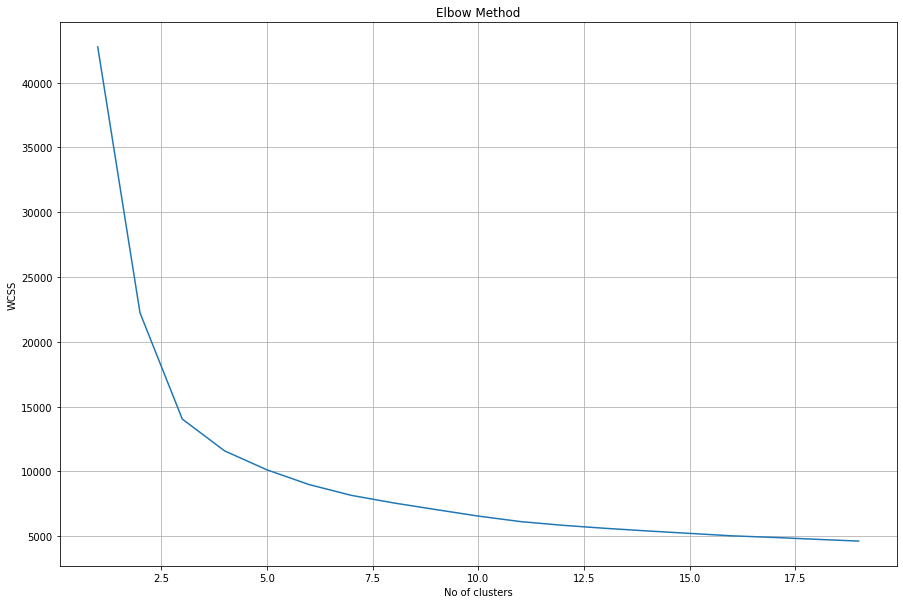

In [31]:
K = kaggle_features_cluster
K = K.iloc[:,[0,1,2, 3 ,4,5,6,7]].values
from sklearn.cluster import KMeans
wcss =[]
for j in range (1,20):
    kmeans = KMeans(n_clusters = j, init = 'k-means++', max_iter =100, n_init = 10, random_state = 0)
    kmeans.fit(K)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [32]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Kmeans = kmeans.fit_predict(K)
kaggle_features_cluster["Kmean_Clusters"] = Kmeans

In [33]:
cluster1 = cluster2 = cluster0 = cluster3 = cluster4 = 0

for row in kaggle_features_cluster["Kmean_Clusters"]:
    if row == 1:
        cluster1 = cluster1 + 1
    elif row == 2:
        cluster2 = cluster2 + 1
    elif row == 3:
        cluster3 = cluster3 + 1
    elif row == 4:
        cluster4 = cluster4 + 1
    else:
        cluster0 = cluster0 + 1
print(cluster3)
Cluster = [cluster3, cluster0, cluster4, cluster2, cluster1]

6877


In [45]:
kaggle_features_cluster.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,global_subjectivity,global_rate_positive_words,rate_positive_words,rate_negative_words,title_subjectivity,Kmean_Clusters,DBScanCluster
0,2.833213,6.742881,0.426887,0.482216,0.024764,0.552632,0.447368,0.000000,2,0
1,2.197225,6.561031,0.521924,0.495110,0.032532,0.638889,0.361111,0.100000,2,0
2,2.079442,7.150701,0.443922,0.405107,0.032157,0.640625,0.359375,0.000000,3,0
3,2.397895,6.331502,0.444840,0.262625,0.021352,0.387097,0.612903,0.107143,2,0
4,2.708050,5.030438,0.640523,0.112500,0.000000,0.000000,1.000000,0.250000,0,0


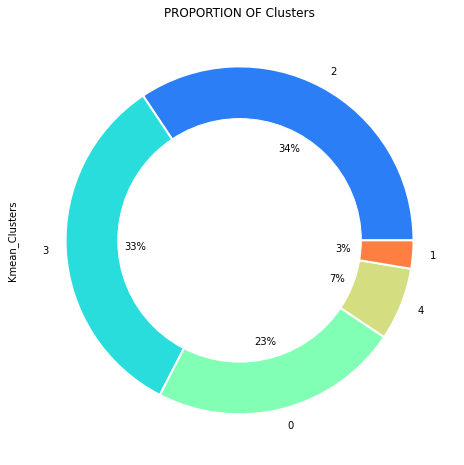

In [46]:
plt.figure(figsize=(8,8))
kaggle_features_cluster["Kmean_Clusters"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",5),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF Clusters")
plt.show()

In [47]:
kaggle_features_cluster.groupby(['Kmean_Clusters'])['n_tokens_title'].count()

Kmean_Clusters
0    4823
1     544
2    7148
3    6877
4    1408
Name: n_tokens_title, dtype: int64

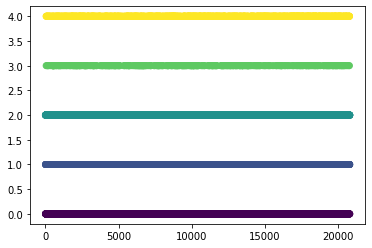

In [48]:
kmeans = KMeans(n_clusters=5)
clusteredData = kmeans.fit_predict(kaggle_features_cluster)
plt.plot(figsize = (600,600))
plt.scatter(kaggle_features_cluster.index,clusteredData, c= clusteredData, alpha=0.8) 
plt.show()

In [49]:

print((kaggle_features_cluster.iloc[list(np.where(clusteredData==0))[0],:]))
print((kaggle_features_cluster.iloc[list(np.where(clusteredData==1))[0],:]))
print((kaggle_features_cluster.iloc[list(np.where(clusteredData==2))[0],:]))
print((kaggle_features_cluster.iloc[list(np.where(clusteredData==3))[0],:]))

       n_tokens_title  n_tokens_content  n_unique_tokens  global_subjectivity  \
2            2.079442          7.150701         0.443922             0.405107   
8            3.091042          7.275865         0.350865             0.461278   
9            2.833213          7.465083         0.367125             0.332042   
10           2.772589          7.319202         0.379722             0.389101   
14           2.708050          8.703175         0.276154             0.503668   
...               ...               ...              ...                  ...   
20783        2.639057          7.066467         0.552901             0.381156   
20784        2.708050          7.301822         0.424140             0.424168   
20785        2.639057          6.877296         0.411340             0.574764   
20796        2.564949          7.024649         0.349644             0.413826   
20799        1.945910          7.075809         0.487743             0.449643   

       global_rate_positive

In [61]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(kaggle_features_cluster)

In [63]:
row_dict = []
for index, row in kaggle_features_cluster.iterrows():
        row_dict.append(row['n_tokens_title'])

In [64]:
clusternames = km.predict(kaggle_features_cluster)
print(clusternames)
clusters = {}
n = 0
for id in clusternames:
    if id in clusters:
        if(row_dict[n] not in clusters[id]):
            clusters[id].append(row_dict[n])
    else:
        clusters[id] = [row_dict[n]]
    n +=1

[2 2 3 ... 2 0 3]


In [65]:
import random
for item in clusters:
    print ("Cluster ", item + 1)
    n = 1
    print(random.sample(clusters[item], 20))

Cluster  3
[3.4339872044851463, 3.737669618283368, 3.7135720667043084, 3.332204510175204, 2.302585092994046, 2.8332133440562166, 2.19722457733622, 0.6931471805599453, 3.4657359027997265, 3.1354942159291497, 3.2958368660043287, 2.8903717578961645, 3.4011973816621555, 3.1780538303479458, 3.5263605246161616, 3.3672958299864737, 3.58351893845611, 2.5649493574615367, 2.4849066497880004, 1.6094379124341005]
Cluster  4
[2.3978952727983707, 2.302585092994046, 2.9957322735539913, 3.737669618283368, 3.0910424533583165, 2.8332133440562166, 2.5649493574615367, 3.0445224377234235, 3.1354942159291497, 3.4011973816621555, 1.6094379124341005, 3.3672958299864737, 3.4657359027997265, 3.6635616461296463, 1.791759469228055, 3.58351893845611, 3.332204510175204, 1.3862943611198906, 2.6390573296152584, 3.258096538021482]
Cluster  1
[2.302585092994046, 3.1780538303479458, 2.772588722239781, 4.007333185232471, 3.58351893845611, 2.19722457733622, 2.8903717578961645, 2.9444389791664403, 2.5649493574615367, 2.833

## DBScan clustering

In [66]:
kaggle_features_cluster.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,global_subjectivity,global_rate_positive_words,rate_positive_words,rate_negative_words,title_subjectivity,Kmean_Clusters,DBScanCluster
0,2.833213,6.742881,0.426887,0.482216,0.024764,0.552632,0.447368,0.000000,2,0
1,2.197225,6.561031,0.521924,0.495110,0.032532,0.638889,0.361111,0.100000,2,0
2,2.079442,7.150701,0.443922,0.405107,0.032157,0.640625,0.359375,0.000000,3,0
3,2.397895,6.331502,0.444840,0.262625,0.021352,0.387097,0.612903,0.107143,2,0
4,2.708050,5.030438,0.640523,0.112500,0.000000,0.000000,1.000000,0.250000,0,0


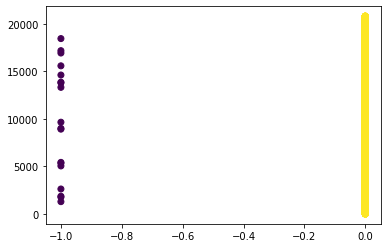

In [67]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=1000)
clustering.fit(kaggle_features_cluster)

clusteredData2 = clustering.fit_predict(kaggle_features_cluster)
plt.scatter(clusteredData2,kaggle_features_cluster.index, c= clusteredData2)


In [68]:

kaggle_features_cluster['DBScanCluster']=clusteredData2 
kaggle_features_cluster

,n_tokens_title,n_tokens_content,n_unique_tokens,global_subjectivity,global_rate_positive_words,rate_positive_words,rate_negative_words,title_subjectivity,Kmean_Clusters,DBScanCluster
0,2.833213,6.742881,0.426887,0.482216,0.024764,0.552632,0.447368,0.000000,2,0
1,2.197225,6.561031,0.521924,0.495110,0.032532,0.638889,0.361111,0.100000,2,0
2,2.079442,7.150701,0.443922,0.405107,0.032157,0.640625,0.359375,0.000000,3,0
3,2.397895,6.331502,0.444840,0.262625,0.021352,0.387097,0.612903,0.107143,2,0
4,2.708050,5.030438,0.640523,0.112500,0.000000,0.000000,1.000000,0.250000,0,0
...,...,...,...,...,...,...,...,...,...,...
20795,2.397895,5.739793,0.601286,0.442076,0.016077,0.500000,0.500000,0.000000,0,0
20796,2.564949,7.024649,0.349644,0.413826,0.024911,0.538462,0.461538,0.454545,3,0
20797,2.833213,6.723832,0.462740,0.466389,0.036058,0.750000,0.250000,0.454545,2,0
20798,2.197225,5.620401,0.590580,0.209632,0.007246,0.200000,0.800000,0.000000,0,0


In [42]:
kaggle_features_cluster.groupby(['DBScanCluster'])['n_tokens_title'].count()

DBScanCluster
-1       18
 0    20782
Name: n_tokens_title, dtype: int64